Scrappig the website for reviews

In [2]:
import re
import requests
import random
from bs4 import BeautifulSoup
from tqdm import tqdm
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
def userinfo(text):
  """ return User info that is User name , Country and Review date
  input: text containg all in one string
  output: name,country,date
  """
  name = text[:text.find("(")]
  country = text[text.find("(") + 1:text.find(")")]
  date = text[text.find(")")+1:]
  return name,country,date

In [4]:
def scrape_page(review):
    """
    Gets review element as an input and return review dict
    Input:
        review: HTML element of review
    Output: Dict
        return Review dict that contains all review data
    """
    subHeader=review.find('h3',{'class':"text_sub_header userStatusWrapper"}).text.strip()
    user,country,date=userinfo(subHeader)
    Short_review=review.find('h2',{'class':"text_header"}).text.strip("“”")
    review_text=review.find('div',{'class':"text_content"}).text
    ##review_rating=int(review.find('div',{"itemprop":"reviewRating"}).find_next().text)
    try:
        Traveler_Type=review.find('td',{'class':"review-rating-header type_of_traveller"}).find_next().text
    except:
        Traveler_Type="NA"
    try:
        Recomended=review.find('td',{'class':"review-rating-header recommended"}).find_next().text
    except:
        Recomended='NA'
    try:
        Seat_Type=review.find('td',{'class':"review-rating-header cabin_flown"}).find_next().text
    except:
        Seat_Type="NA"
    try:
        Route=review.find('td',{'class':"review-rating-header route"}).find_next().text.strip()
    except:
        Route='N/A'
    try:
        Flight_Date=review.find('td',{'class':"review-rating-header date_flown"}).find_next().text.strip()
    except:
        Flight_Date="N/A"
    try:
        seat_comfort=len(review.find('td',{'class':"review-rating-header seat_comfort"}).find_next().find_all('span',{'class':"star fill"}))
    except:
        seat_comfort=0
    try:
        cabin_staff_service=len(review.find('td',{'class':"review-rating-header cabin_staff_service"}).find_next().find_all('span',{'class':"star fill"}))
    except:
        cabin_staff_service=0
    try:
        ground_service=len(review.find('td',{'class':"review-rating-header ground_service"}).find_next().find_all('span',{'class':"star fill"}))
    except:
        ground_service=0
    try:
        value_for_money=len(review.find('td',{'class':"review-rating-header value_for_money"}).find_next().find_all('span',{'class':"star fill"}))
    except:
        value_for_money=0

    try:
        food_and_beverages=len(review.find('td',{'class':"review-rating-header food_and_beverages"}).find_next().find_all('span',{'class':"star fill"}))
    except:
        food_and_beverages=0
    try:
        inflight_entertainment=len(review.find('td',{'class':"review-rating-header inflight_entertainment"}).find_next().find_all('span',{'class':"star fill"}))
    except:
        inflight_entertainment=0
    try:
        wifi_and_connectivity=len(review.find('td',{'class':"review-rating-header wifi_and_connectivity"}).find_next().find_all('span',{'class':"star fill"}))
    except:
        wifi_and_connectivity=0
    itemprop="reviewRating"
    return {
        'Name':user,
        #"review_rating":review_rating,
        "Country":country,
        "Review_Date":date,
        "Short_Review":Short_review,
        "Review_text":review_text,
        "Recommended":Recomended,
        "Seat_Type":Seat_Type,
        "Route":Route,
        "Flight_Date":Flight_Date,
        "seat_comfort":seat_comfort,
        "cabin_staff_service":cabin_staff_service,
        "ground_service":ground_service,
        "value_for_money":value_for_money,
        "food_and_beverages":food_and_beverages,
        "inflight_entertainment":inflight_entertainment,
        "wifi_and_connectivity":wifi_and_connectivity,
        "review_id": ''.join(random.choices('0123456789', k=6))
    }

In [5]:
def get_articles(url):
  """ gets url as input and returns review list as paresed html
  input:
   url  => url to scrape website
  Output:
    articles => list of reviews
  """
  response=response = requests.get(url)
  content = response.content
  parsed_content = BeautifulSoup(content, 'html.parser')
  articles=parsed_content.find_all("article",{"itemprop":"review"})
  return articles

In [6]:
def Scrape_site(Base_url,pages, page_size):
  """ returnd lidt of reviews dicticonry
  Input:
    Base_url => base url of website
    pages => number of pages to scrape
    page_size => number of reviews per page
  Output:
    Reviews_dicts => list of reviews dicts
  """
  Reviews_dicts=[]
  for i in tqdm(range(1, pages + 1)):
      articles=get_articles(url = f"{Base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}")
      for each in articles:
          Reviews_dicts.append(scrape_page(each))
  return Reviews_dicts

In [7]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 39
page_size = 100
Reviews=Scrape_site(Base_url=base_url,pages=pages,page_size=page_size)

100%|██████████| 39/39 [01:26<00:00,  2.21s/it]


In [8]:
df=pd.DataFrame(Reviews)
df.head()

,Name,Country,Review_Date,Short_Review,Review_text,Recommended,Seat_Type,Route,Flight_Date,seat_comfort,cabin_staff_service,ground_service,value_for_money,food_and_beverages,inflight_entertainment,wifi_and_connectivity,review_id
0,Thomas Wilson,United States,13th September 2024,"""very disappointed""",Not Verified | My wife and I are very disappo...,no,Economy Class,Amsterdam to Pittsburgh via London,September 2024,2,2,1,1,2,2,2,162534
1,Stephen Cooper,Australia,13th September 2024,"""happily recommend and use BA""",Not Verified | We flew BA between Heathrow an...,yes,Economy Class,Heathrow to Berlin,July 2024,3,4,4,3,3,0,0,859921
2,S Grimsditch,United Kingdom,13th September 2024,"""cannot get compensation for our flight""",Not Verified | Absolutely disgusted with BA. ...,no,Economy Class,Manchester to Seattle via London,May 2024,0,0,1,1,0,0,0,256938
3,Mark Simons,United Kingdom,11th September 2024,Crew very friendly and attentive,Not Verified | Took a trip to Nashville with m...,yes,Business Class,London Heathrow to Nashville,August 2024,4,4,2,3,4,2,0,167907
4,B Owen,United Kingdom,8th September 2024,"""A nightmare journey""",Not Verified | A nightmare journey courtesy o...,no,Economy Class,London to Venice,September 2024,2,3,1,1,0,0,0,417111


## Cleaning Reviews Coulmns

In [9]:
def remove_verified_phrases(text):
    """Removes the phrases "Verified" or "✅ Trip Verified" from the given text.
    Args:
        text (str): The input text.
    Returns:
        str: The text with the phrases removed.
    """
    if "Not Verified | " in text:
      text = text.replace("Not Verified | ", "")
    if "✅ Trip Verified | " in text:
      text = text.replace("✅ Trip Verified | ", "")
    text=re.sub(r"\(\)", "", text)
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\[.*?\]|\(.*?\)', '', text)
    text = re.sub(r'\\', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

In [10]:
df["reviewText"]= df['Review_text'].apply(remove_verified_phrases)

In [11]:
df[['reviewText','Review_text']].head()

,reviewText,Review_text
0,My wife and I are very disappointed with flyin...,Not Verified | My wife and I are very disappo...
1,We flew BA between Heathrow and Berlin one way...,Not Verified | We flew BA between Heathrow an...
2,Absolutely disgusted with BA Our flights were ...,Not Verified | Absolutely disgusted with BA. ...
3,Took a trip to Nashville with my wife for a le...,Not Verified | Took a trip to Nashville with m...
4,A nightmare journey courtesy of British Airway...,Not Verified | A nightmare journey courtesy o...


In [12]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Removing stopwords

In [13]:
def remove_stopwords(sentence, stopwords):
  filterd_sentence = [item.lower() for item in sentence if item.lower() not in stopwords]
  return ' '.join(filterd_sentence)


In [14]:
df['cleaned_reviewText'] = df['reviewText'].astype('str').apply(lambda x: remove_stopwords(x.split(), stopwords))

In [15]:
df[['cleaned_reviewText','reviewText']]

,cleaned_reviewText,reviewText
0,wife disappointed flying british airways fligh...,My wife and I are very disappointed with flyin...
1,flew ba heathrow berlin one way connection exp...,We flew BA between Heathrow and Berlin one way...
2,absolutely disgusted ba flights cancelled 1 ma...,Absolutely disgusted with BA Our flights were ...
3,took trip nashville wife leisure break arrived...,Took a trip to Nashville with my wife for a le...
4,nightmare journey courtesy british airways wor...,A nightmare journey courtesy of British Airway...
...,...,...
3856,business lhr bkk 747400 first try back ba 5 ye...,Business LHR to BKK 747400 First try back with...
3857,lhr ham purser addresses club passengers name ...,LHR to HAM Purser addresses all club passenger...
3858,son worked british airways urged fly british a...,My son who had worked for British Airways urge...
3859,london citynew york jfk via shannon a318 reall...,London CityNew York JFK via Shannon on A318 bu...


In [18]:
nltk.download('punkt')
def tokenize_review(review):
  return word_tokenize(review)

df['tokenized_review'] = df['cleaned_reviewText'].apply(tokenize_review)
df[['cleaned_reviewText', 'tokenized_review']].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,cleaned_reviewText,tokenized_review
0,wife disappointed flying british airways fligh...,"[wife, disappointed, flying, british, airways,..."
1,flew ba heathrow berlin one way connection exp...,"[flew, ba, heathrow, berlin, one, way, connect..."
2,absolutely disgusted ba flights cancelled 1 ma...,"[absolutely, disgusted, ba, flights, cancelled..."
3,took trip nashville wife leisure break arrived...,"[took, trip, nashville, wife, leisure, break, ..."
4,nightmare journey courtesy british airways wor...,"[nightmare, journey, courtesy, british, airway..."


In [20]:
nltk.download('averaged_perceptron_tagger')
def pos_tagging(tokens):
  return nltk.pos_tag(tokens)

df['pos_tags'] = df['tokenized_review'].apply(pos_tagging)
df[['tokenized_review', 'pos_tags']].head()


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,tokenized_review,pos_tags
0,"[wife, disappointed, flying, british, airways,...","[(wife, NN), (disappointed, VBD), (flying, VBG..."
1,"[flew, ba, heathrow, berlin, one, way, connect...","[(flew, JJ), (ba, NN), (heathrow, NN), (berlin..."
2,"[absolutely, disgusted, ba, flights, cancelled...","[(absolutely, RB), (disgusted, VBN), (ba, JJ),..."
3,"[took, trip, nashville, wife, leisure, break, ...","[(took, VBD), (trip, NN), (nashville, JJ), (wi..."
4,"[nightmare, journey, courtesy, british, airway...","[(nightmare, JJ), (journey, NN), (courtesy, NN..."


In [21]:
word_counts = {}
for tokens in df['tokenized_review']:
  for token in tokens:
    if token in word_counts:
      word_counts[token] += 1
    else:
      word_counts[token] = 1

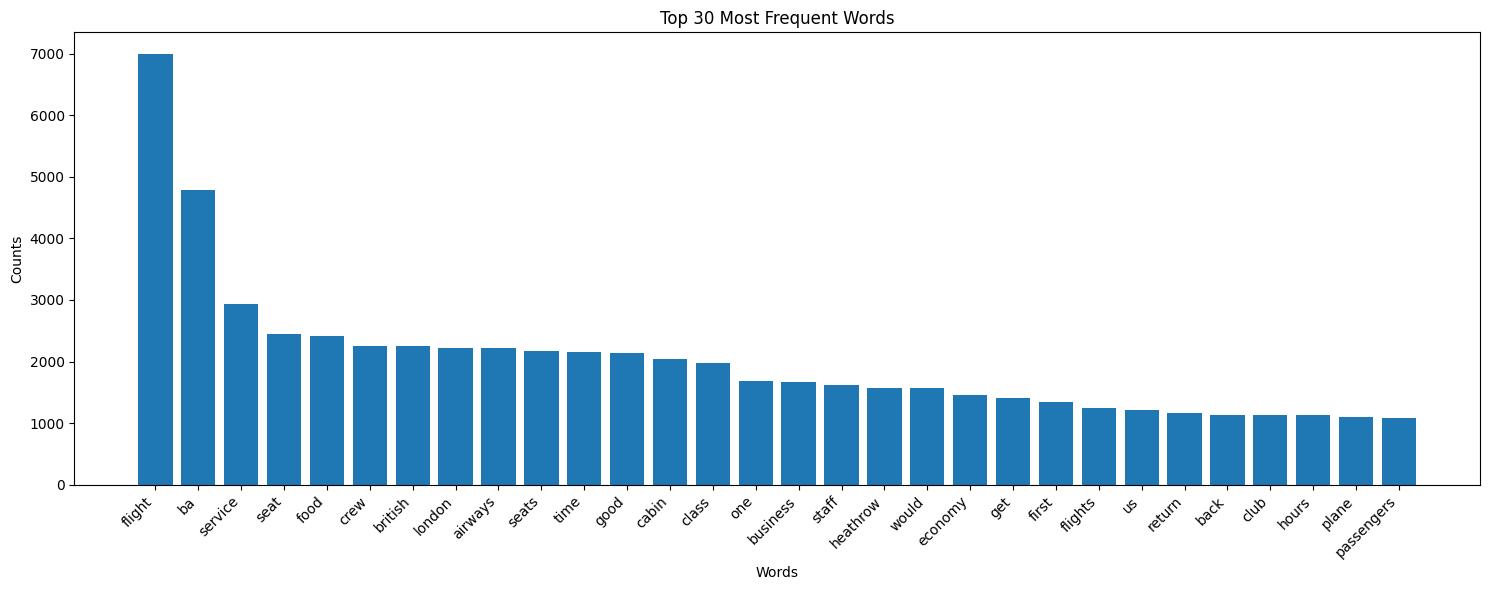

In [22]:

import matplotlib.pyplot as plt

# Sort the word counts in descending order
sorted_word_counts = dict(sorted(word_counts.items(), key=lambda item: item[1], reverse=True))

# Get the top N words to plot
top_n = 30
top_words = list(sorted_word_counts.keys())[:top_n]
top_counts = list(sorted_word_counts.values())[:top_n]

# Create the bar plot
plt.figure(figsize=(15, 6))
plt.bar(top_words, top_counts)
plt.xlabel('Words')
plt.ylabel('Counts')
plt.title('Top {} Most Frequent Words'.format(top_n))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [23]:
sia=SentimentIntensityAnalyzer()

In [25]:
df['polarity_scores'] = [sia.polarity_scores(x)['compound'] for x in df['cleaned_reviewText']]

In [26]:
df['Recommended'].value_counts()

,count
Recommended,
no,2317
yes,1544


In [28]:
df['RecommendedValue']=df['Recommended'].replace({'yes':1,'no':0})

In [29]:
df['RecommendedValue'].value_counts()

,count
RecommendedValue,
0,2317
1,1544


In [30]:
import plotly.express as px

In [31]:
px.box(df,x='RecommendedValue',y='polarity_scores')

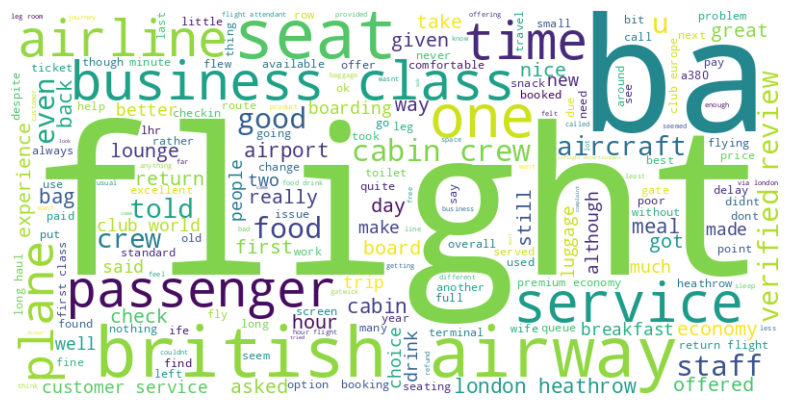

In [32]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = " ".join(df['cleaned_reviewText'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [33]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [34]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [42]:
nltk.download('wordnet')
def analyze_sentiment(tokens):
    """Analyzes the sentiment of a given list of tokens using NLTK."""
    use_stemming = True
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    tokens_to_analyze = stemmed_tokens if use_stemming else lemmatized_tokens

    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(" ".join(tokens_to_analyze))

    return sentiment

In [43]:
df['slSentiment']=df['tokenized_review'].apply(analyze_sentiment)

Streaming output truncated to the last 5000 lines.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading packa